Import Essential Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Import "merged_lego_dataset.csv"

In [2]:
legoData = pd.read_csv("merged_lego_dataset.csv")
#Merged 2 datasets and extracted the set_ids found in both sets into a merged dataset
legoData.head()

,set_id,set_name,release_year,theme_id,num_parts,num_figs,retail_price,num_unique_figs,set_rating,retire_month,...,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,60244-1,Police Helicopter Transport,2020,61,317,4,39.99,3,4.6,Oct-21,...,Box,6,Retail,317.0,4.0,925.0,0.0,49.99,4.0,19.8000
1,60248-1,Fire Helicopter Response,2020,58,93,3,17.99,0,4.4,Nov-21,...,Box,2,Retail,93.0,3.0,1137.0,2.3,29.99,1.0,9.9900
2,60252-1,Construction Bulldozer,2020,56,126,2,17.99,0,4.5,Nov-21,...,Box,4,Retail,126.0,2.0,2606.0,3.8,19.99,9.0,18.5000
3,60254-1,Race Boat Transporter,2020,52,239,2,24.99,0,4.6,Nov-21,...,Box,4,Retail,238.0,2.0,2245.0,4.0,29.99,2.0,28.0000
4,60258-1,Tuning Workshop,2020,52,897,7,89.99,6,4.6,Nov-21,...,Box,12,Retail,897.0,7.0,3111.0,4.1,99.99,11.0,73.4902


Extracting numerical predictors from dataset

In [ ]:
#Exploratory Data Analysis
#Let us start by exploring the response variable pop_price, the one we are supposed to predict at the end of the day.

<Axes: xlabel='pop_price', ylabel='Count'>

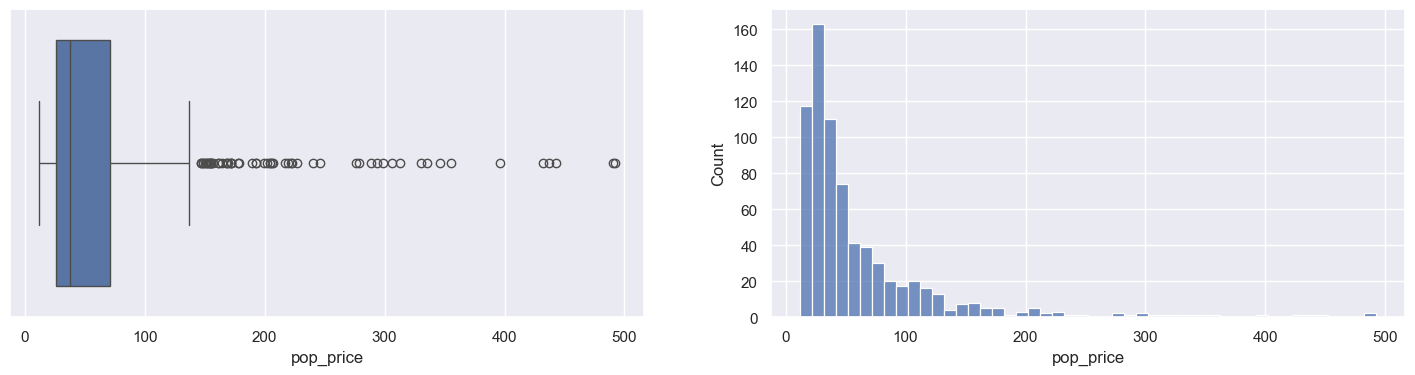

In [28]:

f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = legoData['pop_price'], orient = "h", ax = axes[0])
sb.histplot(data = legoData['pop_price'], ax = axes[1])

In [ ]:
#check out the Numeric predictors

In [3]:
numericalData = legoData[['num_parts','num_figs','retail_price','num_unique_figs']]
numericalData

,num_parts,num_figs,retail_price,num_unique_figs
0,317,4,39.99,3
1,93,3,17.99,0
2,126,2,17.99,0
3,239,2,24.99,0
4,897,7,89.99,6
...,...,...,...,...
717,310,4,34.99,1
718,363,2,34.99,1
719,282,10,24.99,4
720,558,4,49.99,3


In [25]:
numericalData.describe()

,num_parts,num_figs,retail_price,num_unique_figs
count,722.000000,722.00000,722.000000,722.000000
mean,517.495845,2.66759,46.499363,1.529086
std,615.932545,2.84608,44.507298,2.149054
min,52.000000,0.00000,10.990000,0.000000
25%,191.000000,0.00000,19.990000,0.000000
50%,333.000000,2.00000,29.990000,1.000000
75%,602.750000,4.00000,54.990000,2.000000
max,5923.000000,21.00000,399.990000,16.000000


Summary Statistics for Numerical Variables

Summary Statistics for pop_price

In [7]:
def summary_stats_vis(var):
    var_df = pd.DataFrame(legoData[var])
    f = plt.figure(figsize = (24,4))
    sb.boxplot(data = var_df, orient = "h")
    f = plt.figure(figsize = (16,8))
    sb.histplot(data = var_df, kde = True)

Visualisation of summary statistics for numerical data

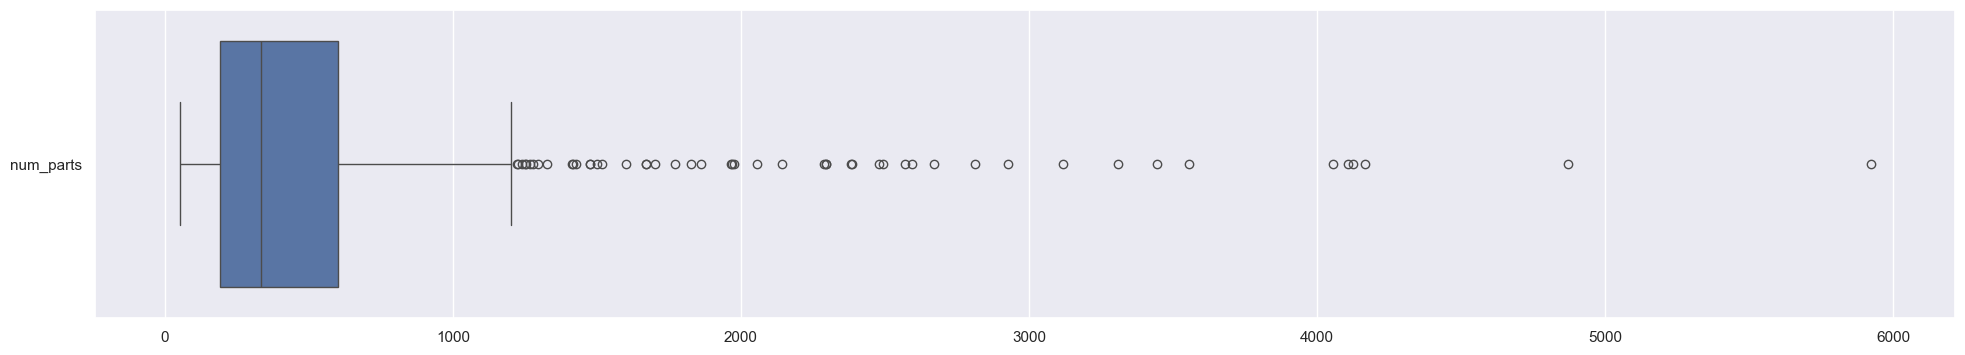

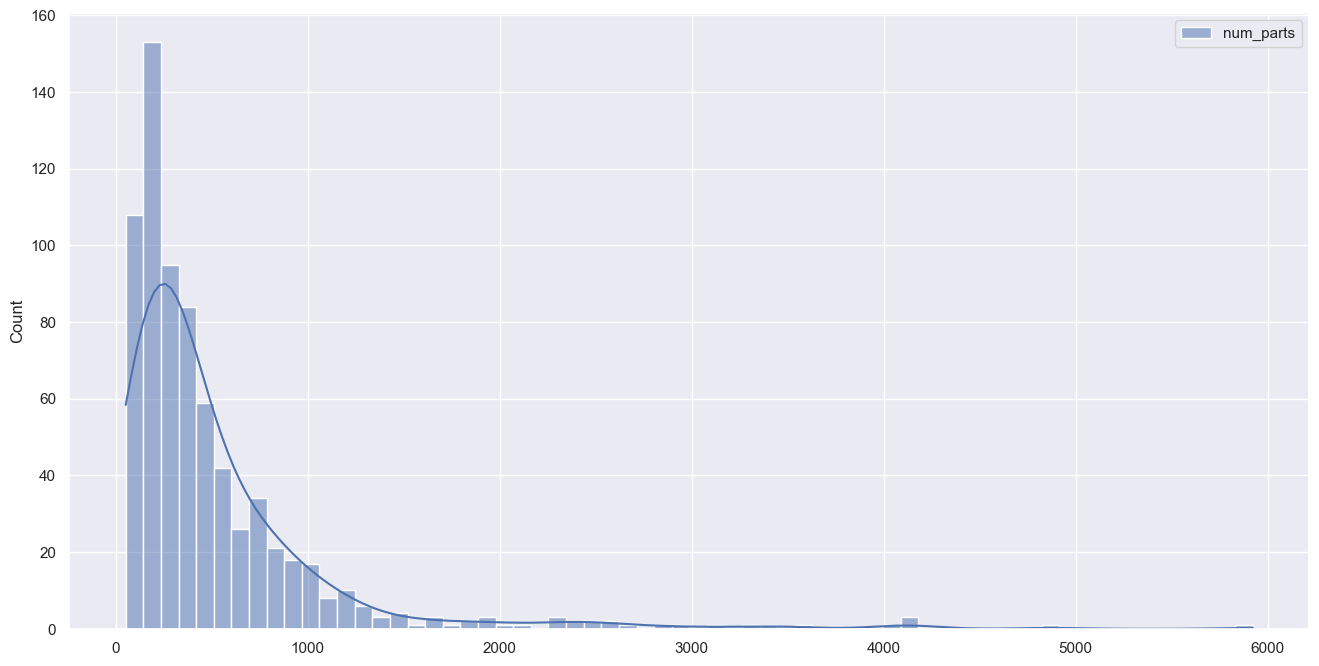

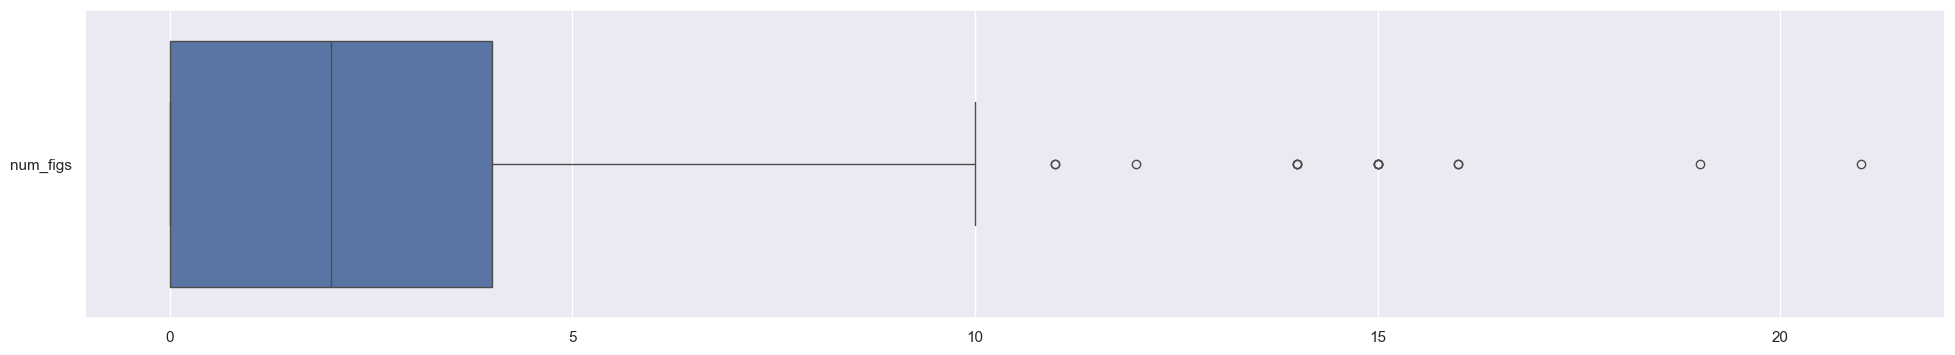

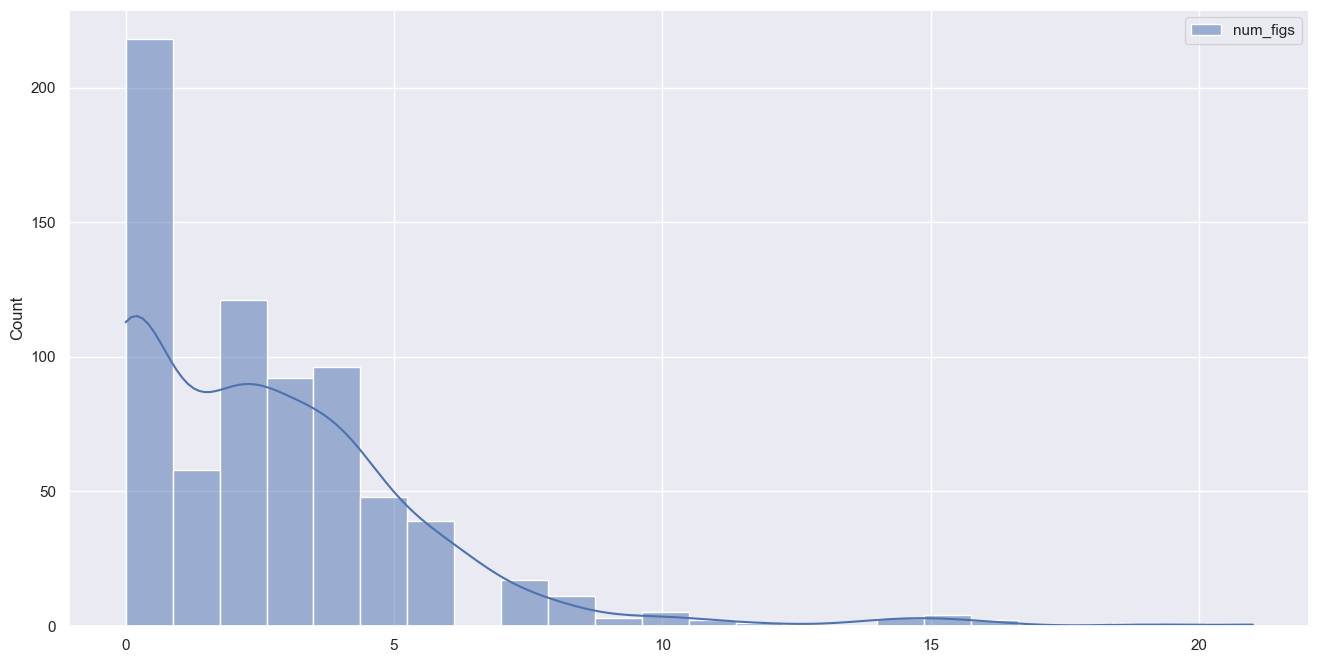

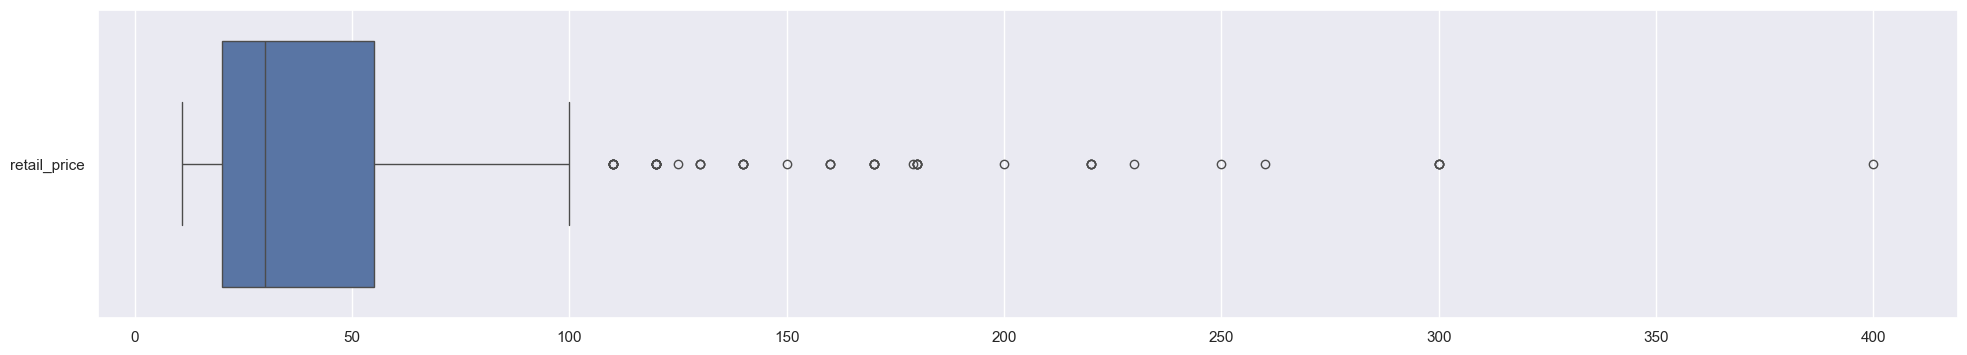

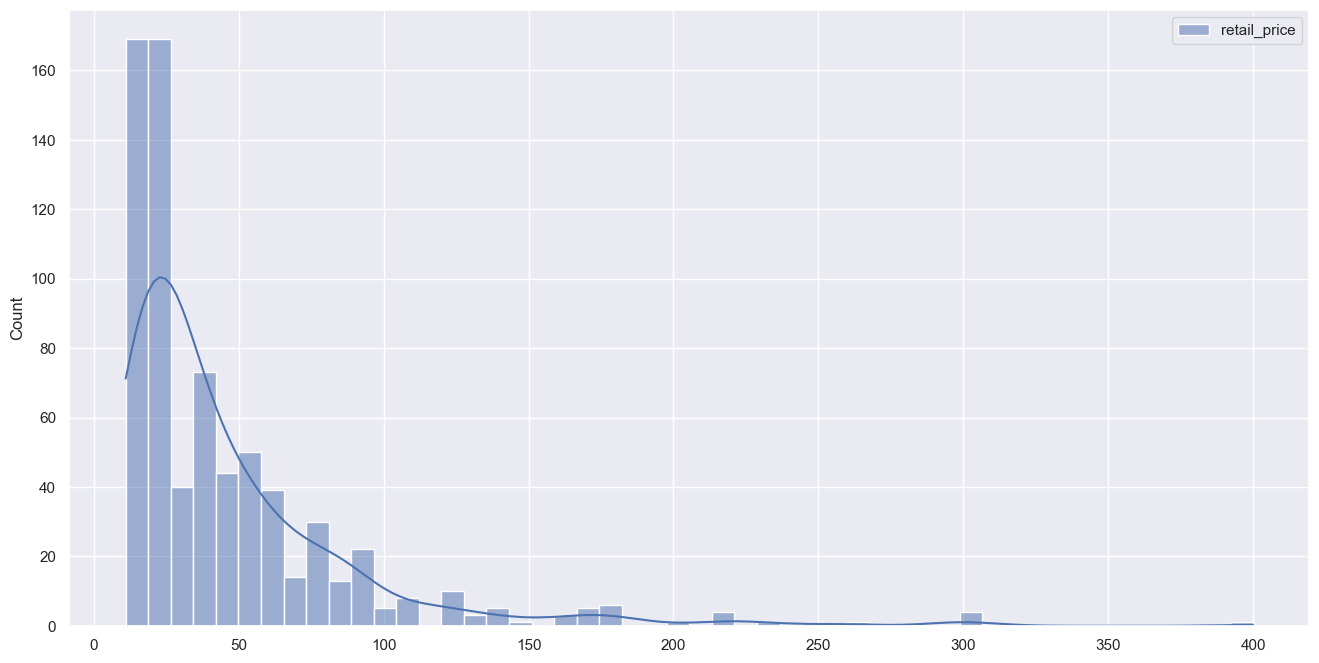

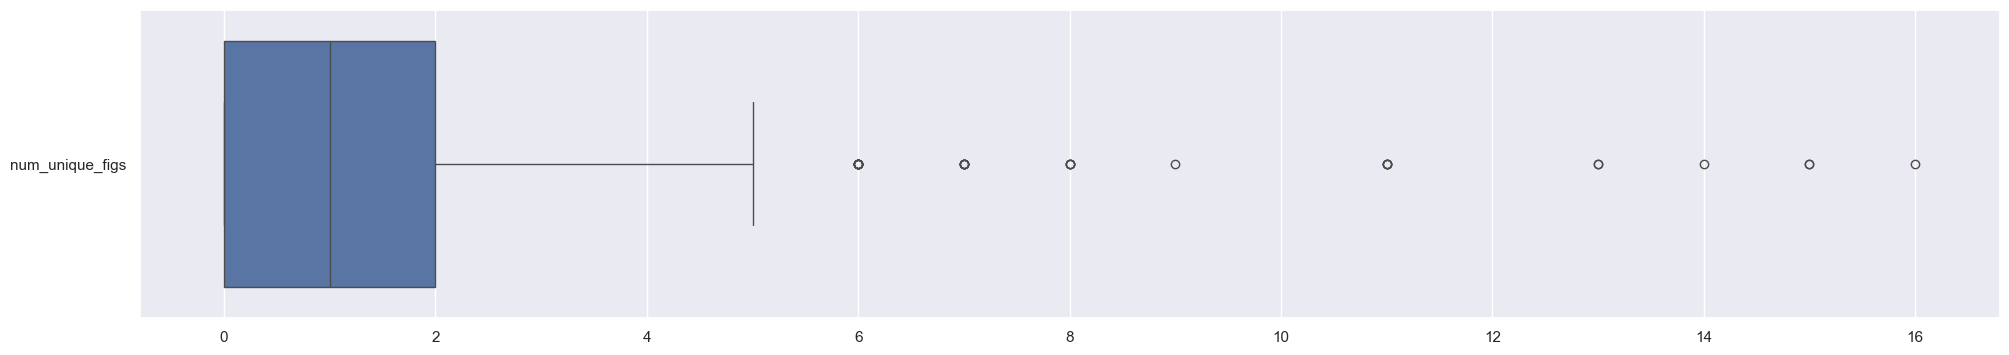

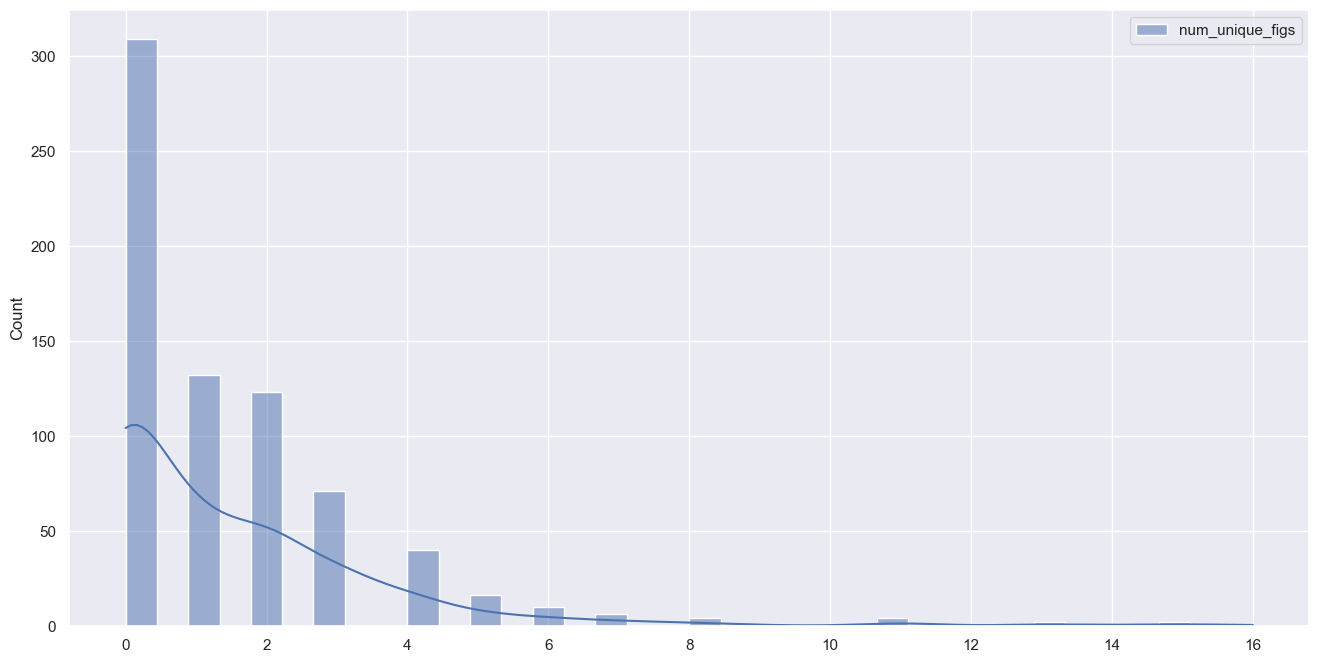

In [8]:
for var in numericalData:
    summary_stats_vis(var)

Function for jointplot against pop_price

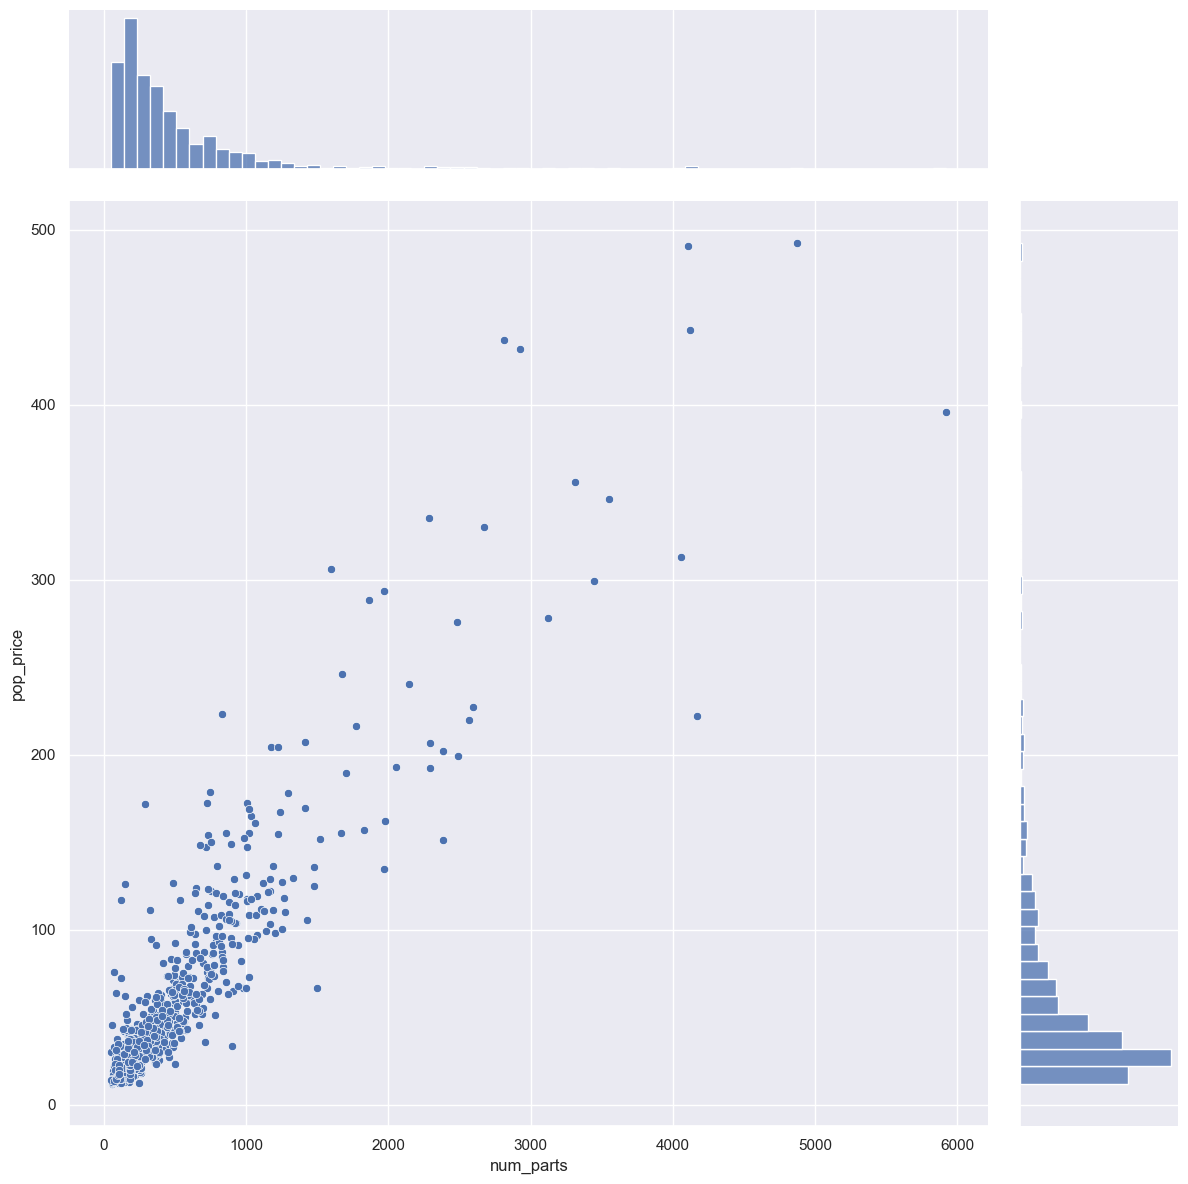

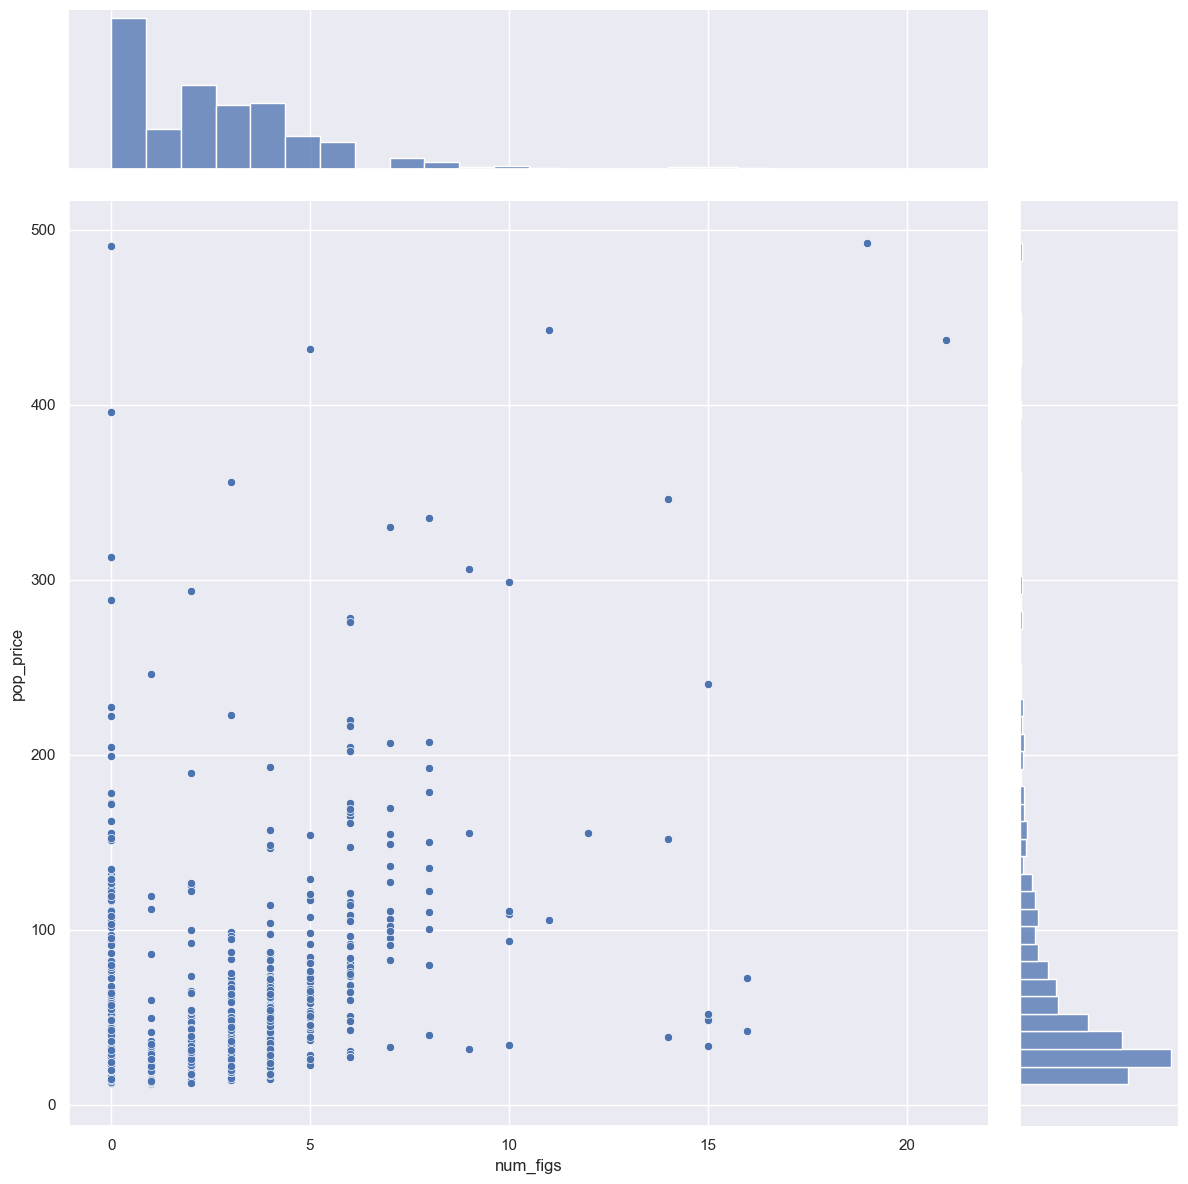

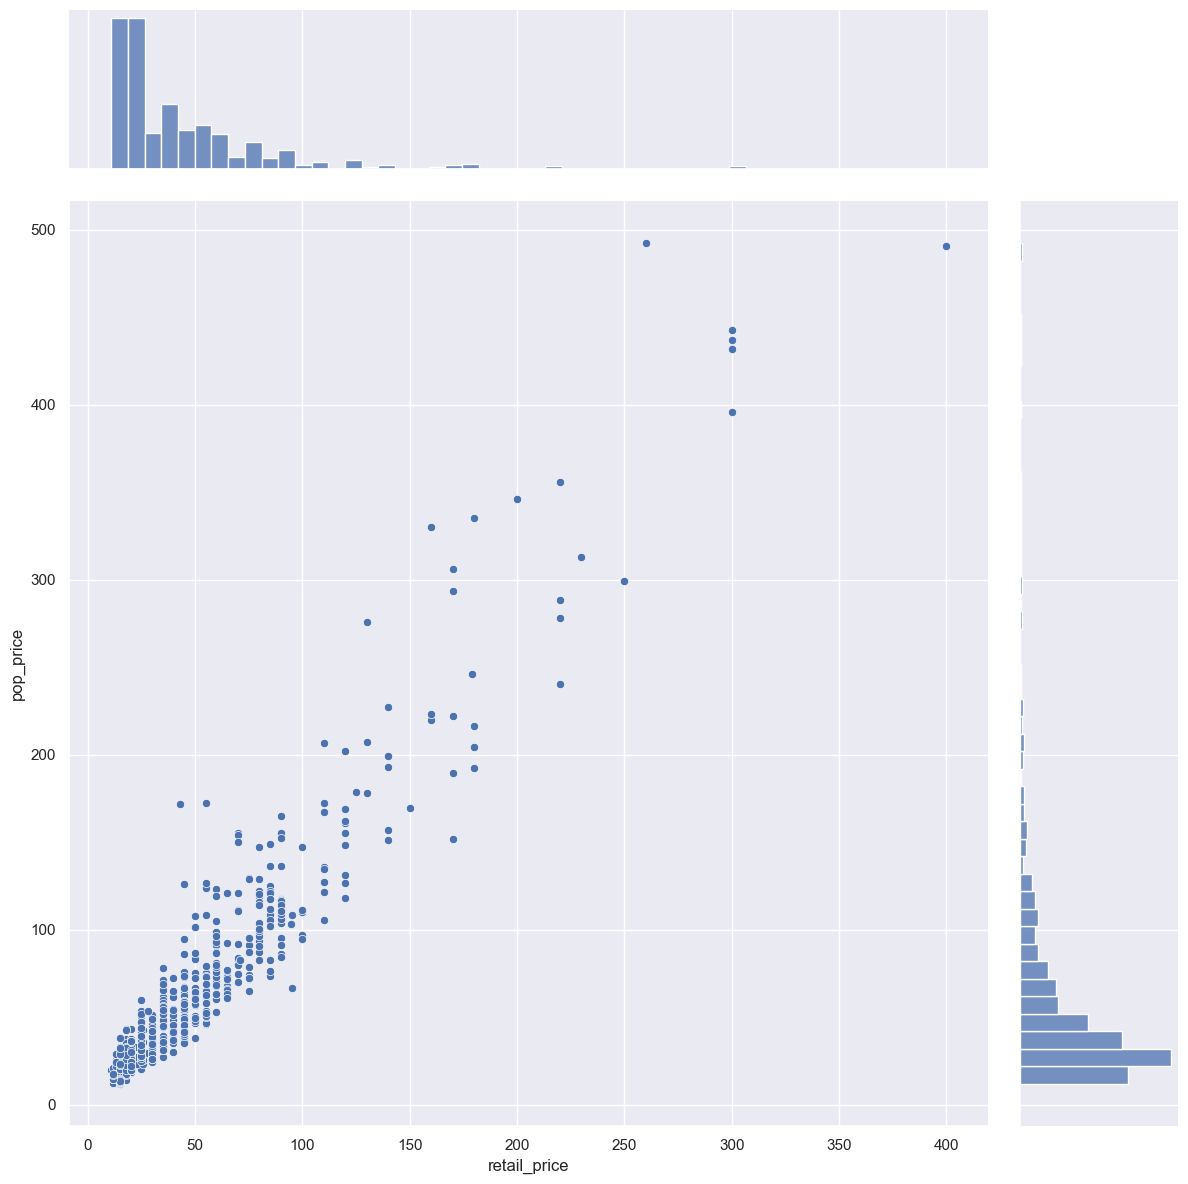

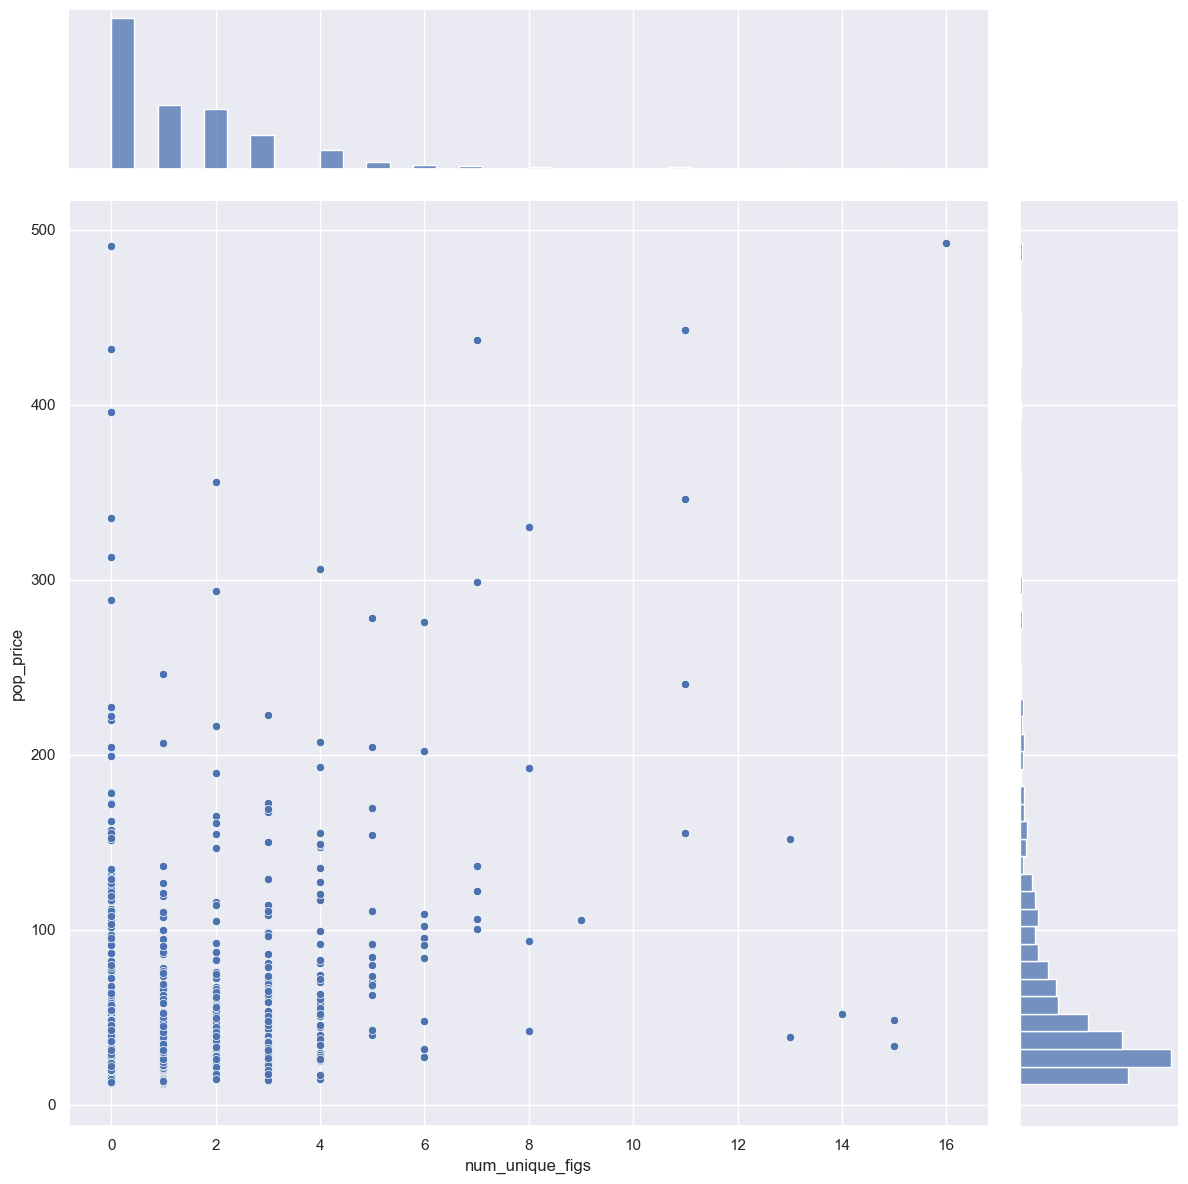

In [9]:
Current_Price = pd.DataFrame(legoData["pop_price"])
def jointplot(var):
    var_df = pd.DataFrame(legoData[var])
    jointDF = pd.concat([Current_Price, var_df],axis = 1)
    sb.jointplot(data = jointDF, x = var, y = "pop_price", height = 12)

for var in numericalData:
    jointplot(var)

Finding relationship between numerical factors and pop_price:
1.num_parts vs pop_price
2.num_figs vs pop_price
3.retail_price vs pop_price
4.num_unique_figs vs pop_price

In [ ]:
#exploration of categorical data

In [10]:

categoricalData = legoData[['theme_id','Rating','Availability']]
categoricalData

,theme_id,Rating,Availability
0,61,0.0,Retail
1,58,2.3,Retail
2,56,3.8,Retail
3,52,4.0,Retail
4,52,4.1,Retail
...,...,...,...
717,158,3.7,Retail
718,158,3.8,Retail
719,209,3.9,Retail
720,158,3.5,Retail


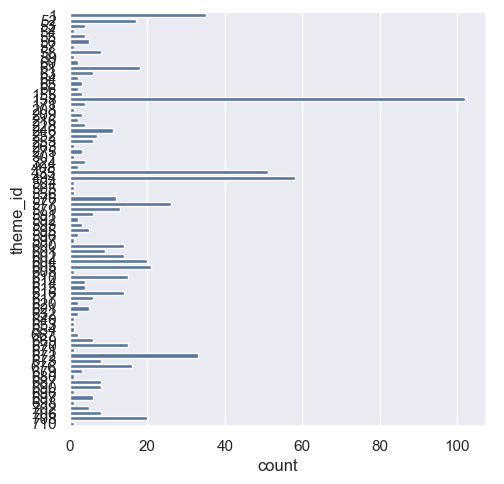

In [11]:
sb.catplot(y = 'theme_id', data = legoData, kind = "count")
#too many categories

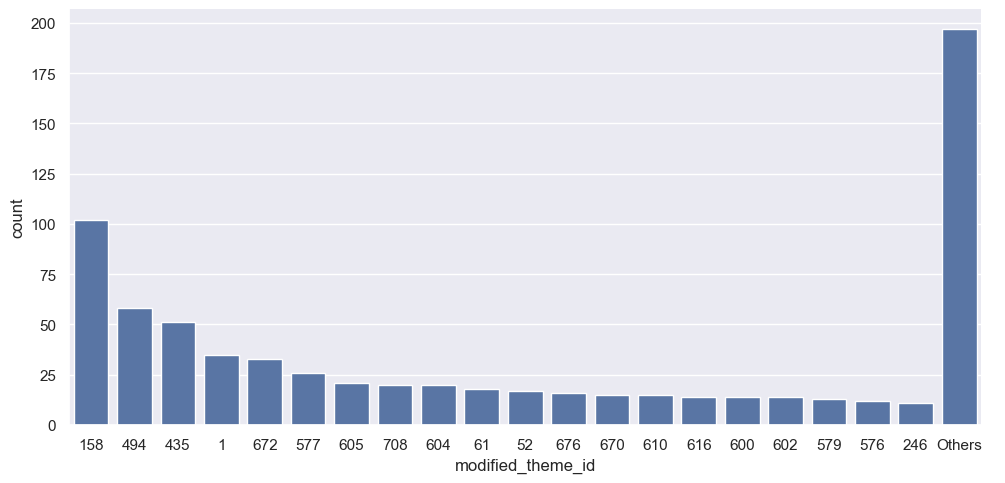

In [12]:
#Too many categories to visualise or perhaps even use, instead we decide to filter out the top 20 most common catergories and treat the rest as a generic others
N = 20
top_n_theme_ids = legoData['theme_id'].value_counts().nlargest(N).index

legoData['modified_theme_id'] = legoData['theme_id'].apply(lambda x: x if x in top_n_theme_ids else 'Others')

sb.catplot(x='modified_theme_id', kind='count', data=legoData, aspect=2, order=top_n_theme_ids.tolist() + ['Others'])


<Axes: xlabel='Rating', ylabel='Count'>

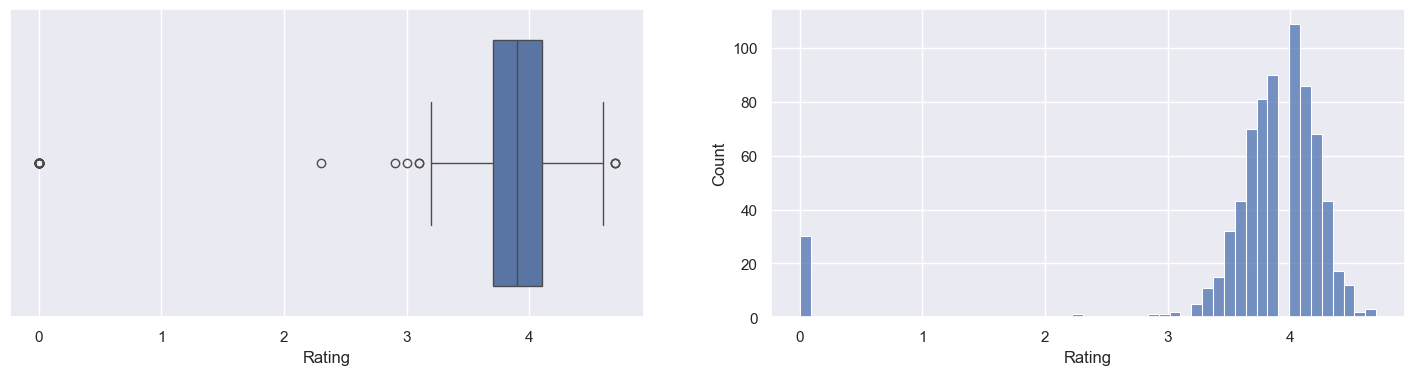

In [13]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = legoData['Rating'], orient = "h", ax = axes[0])
sb.histplot(data = legoData['Rating'], ax = axes[1])
#abunance of 0 could be outliers

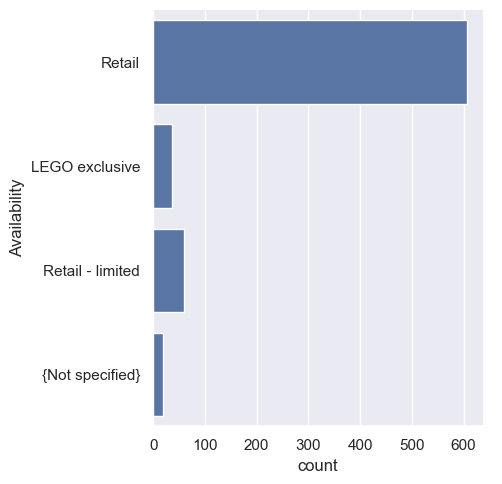

In [14]:
sb.catplot(y = 'Availability', data = legoData, kind = "count")

In [15]:
#Finding relationship between pop_price and categorical data

In [16]:
#categorising prices for easier visualisation

In [17]:
price_bins = [0, 50, 100, 150, 200, 250, 300, np.inf]
price_labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300+']

legoData['price_category'] = pd.cut(legoData['pop_price'], bins=price_bins, labels=price_labels, right=False)


In [18]:
### Theme ID Vs pop price

<Axes: xlabel='modified_theme_id', ylabel='pop_price'>

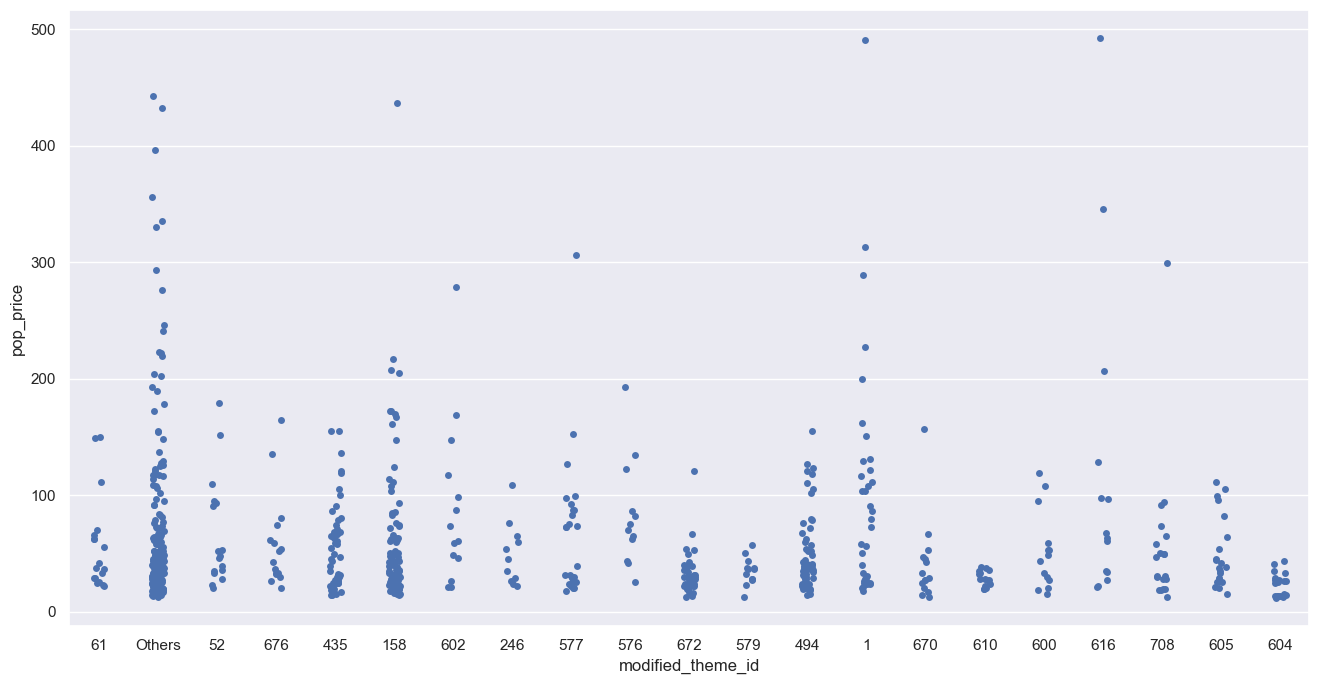

In [19]:

f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'modified_theme_id', y = 'pop_price', data = legoData)

In [20]:
### Set Rating Vs pop price

<Axes: xlabel='Rating', ylabel='pop_price'>

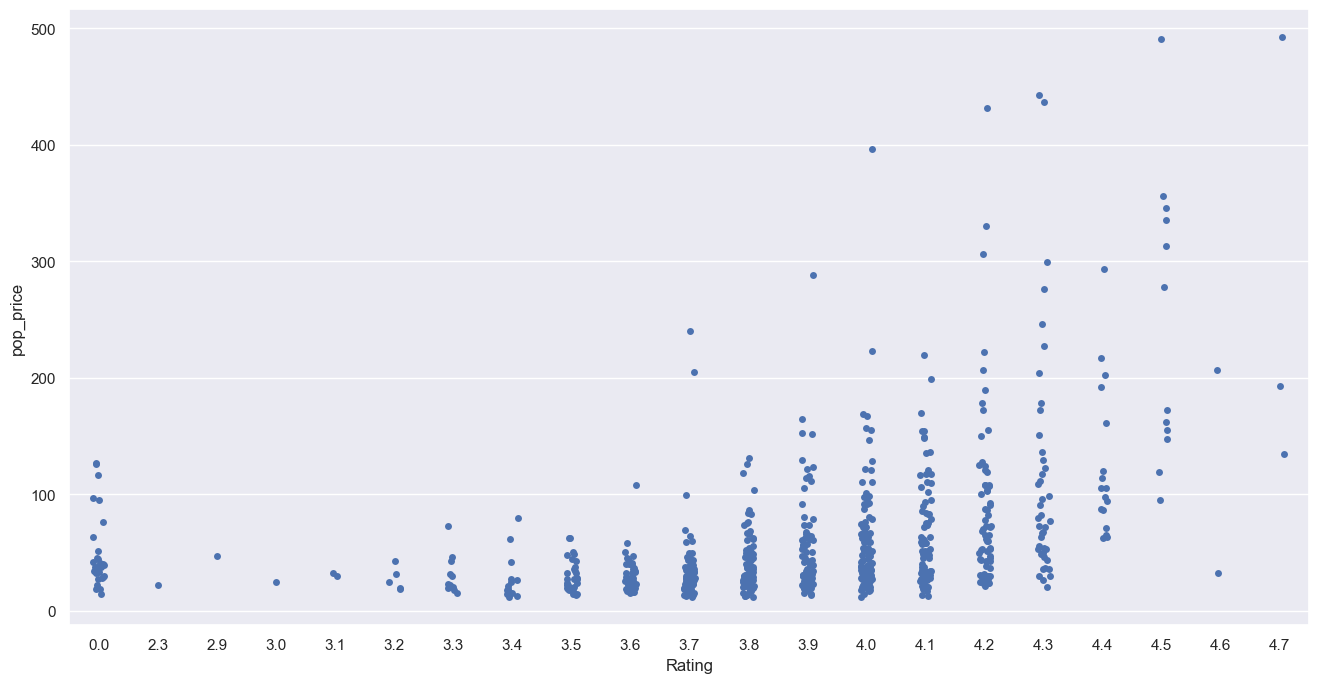

In [21]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Rating', y = 'pop_price', data = legoData)

In [22]:
### Availability Vs pop price

<Axes: xlabel='Availability', ylabel='pop_price'>

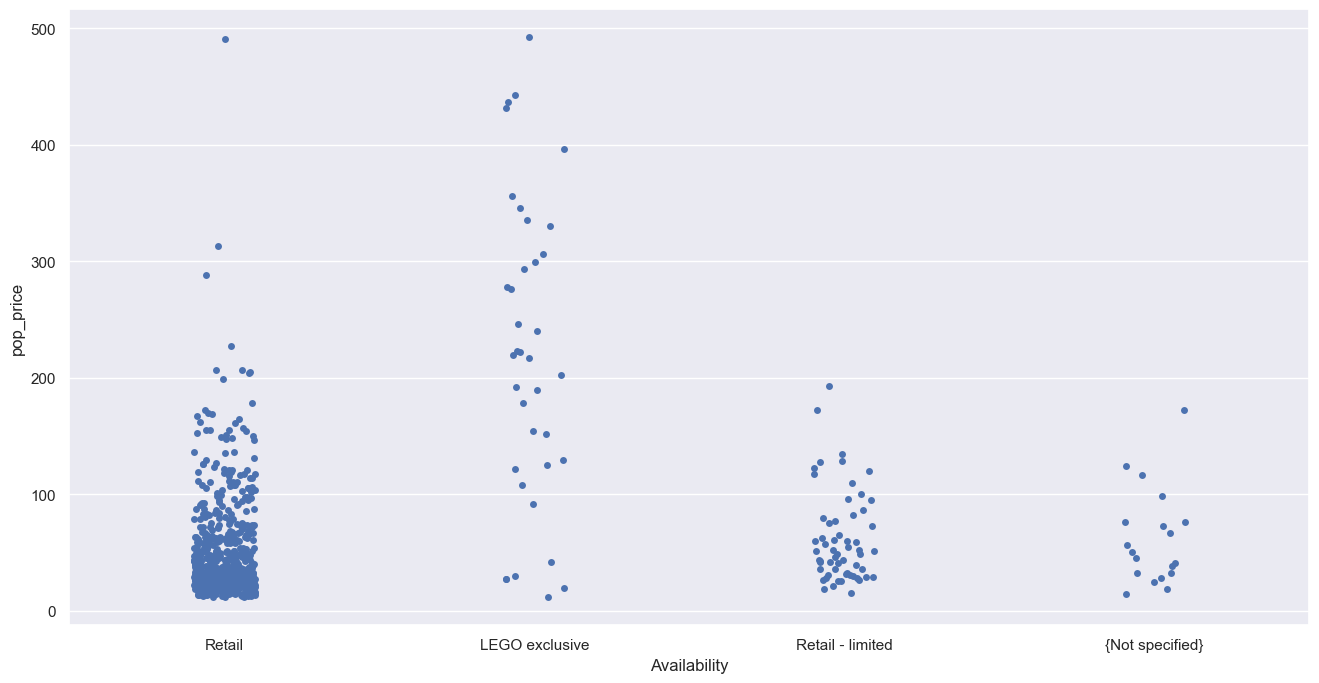

In [23]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Availability', y = 'pop_price', data = legoData)

C:\Users\kang\AppData\Local\Temp\ipykernel_6040\129779762.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sb.heatmap(legoData.groupby(['Availability', 'price_category']).size().unstack(),


<Axes: xlabel='price_category', ylabel='Availability'>

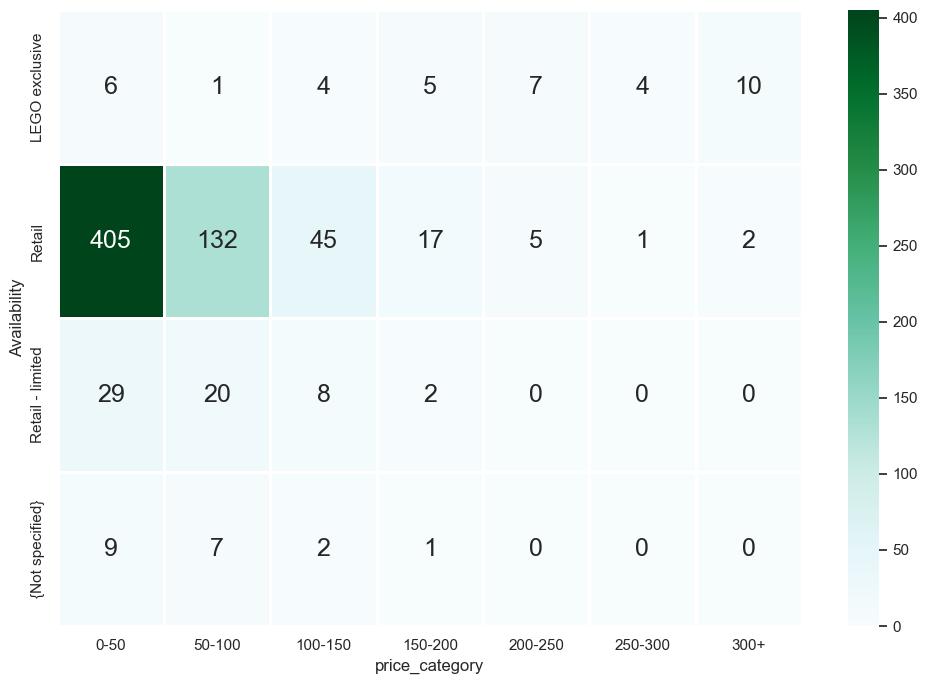

In [24]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(legoData.groupby(['Availability', 'price_category']).size().unstack(),
           linewidths=1, annot=True, fmt='g', annot_kws={"size": 18}, cmap="BuGn")